In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline


In [2]:
# Get the data Ready
hd = pd.read_csv('heart-disease.csv')

In [3]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = hd.drop('target', axis = 1)
y = hd['target']

In [5]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default Parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# Fit the model to the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Make a prediction
y_preds = clf.predict(X_test)

In [11]:
y_preds

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [12]:
y_test

273    0
16     1
3      1
245    0
296    0
      ..
108    1
280    0
163    1
143    1
175    0
Name: target, Length: 61, dtype: int64

In [13]:
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.7704918032786885

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.76      0.85      0.81        34

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [17]:
print(confusion_matrix(y_test, y_preds))

[[18  9]
 [ 5 29]]


In [18]:
print(accuracy_score(y_test, y_preds))

0.7704918032786885


In [19]:
# Improve the model
for i in range(10, 100, 10):
    print(f'Trying with {i} estimators')
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f'Model accuracy score is :{clf.score(X_test, y_test)*100:.2f}%')
    print('\n')

Trying with 10 estimators
Model accuracy score is :72.13%


Trying with 20 estimators
Model accuracy score is :75.41%


Trying with 30 estimators
Model accuracy score is :77.05%


Trying with 40 estimators
Model accuracy score is :77.05%


Trying with 50 estimators
Model accuracy score is :75.41%


Trying with 60 estimators
Model accuracy score is :75.41%


Trying with 70 estimators
Model accuracy score is :77.05%


Trying with 80 estimators
Model accuracy score is :77.05%


Trying with 90 estimators
Model accuracy score is :75.41%




In [20]:
# Save the model

import pickle

pickle.dump(clf, open('GKP_model_1', 'wb'))

loaded_model = pickle.load(open('GKP_model_1', 'rb'))
loaded_model.score(X_test, y_test)

0.7540983606557377

In [21]:
cs = pd.read_csv('car-sales-extended.csv')
cs.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [23]:
cs.describe()

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


In [24]:
len(cs)

1000

In [25]:
cs.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X and y
X = cs.drop('Price', axis =1)
y= cs['Price']

In [27]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [28]:
# Builiding Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
# Let's refit the model
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(transformed_X,y, test_size = 0.2)

In [32]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model.score(X_test, y_test)

0.3235867221569877

In [34]:
# What if there were missing values
csm = pd.read_csv('car-sales-extended-missing-data.csv')

In [35]:
csm.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
csm.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#####  Option 1: Fill the missing Data with Pandas

In [37]:
# Fill the 'Make' column
csm['Make'].fillna('missing', inplace = True)

# Fill the 'Colour' column
csm['Colour'].fillna('missing', inplace = True)

# Fill the Odometer Column
csm['Odometer (KM)'].fillna(csm['Odometer (KM)'].mean(), inplace = True)

# Fill the Doors Column
csm['Doors'].fillna(4, inplace= True)

In [38]:
csm.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
csm['Make'].value_counts()

Toyota     379
Honda      292
Nissan     183
BMW         97
missing     49
Name: Make, dtype: int64

In [40]:
csm['Colour'].value_counts()

White      390
Blue       302
Black       95
Red         88
Green       75
missing     50
Name: Colour, dtype: int64

In [41]:
csm.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
# Remove rows with missing values
csm.dropna(inplace = True)

In [43]:
csm.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
# Create X and y
X = csm.drop('Price', axis =1)
y= csm['Price']

In [45]:
# let's try and convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(csm)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [46]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [47]:
# Fit the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9999491016126744

In [48]:
len(csm)

950

#### Choose the right Algorithm/ estimator for our problem

#### * Picking a machine learning model for a regression problem

In [49]:
# Importing Boston Data Set
from sklearn.datasets import load_boston
boston = load_boston()

In [50]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [51]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
len(boston_df)

506

In [53]:
# Let's Try the Ridge Regression model
from sklearn.linear_model import Ridge

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

# Split the data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
 # Instantiate the model
model = Ridge()
model.fit(X_train, y_train)

# Check the score
model.score(X_test, y_test)

0.6736851013270473

In [54]:
# Try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create the data
X = boston_df.drop('target', axis =1)
y = boston_df['target']

# Split hte data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test )

0.9106715571161221

In [55]:
# Choosing an estimator for classification problem
hd = pd.read_csv('heart-disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
len(hd)

303

In [57]:
# Consulting the map and trying SVC
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Make the data
X = hd.drop('target', axis = 1)
y = hd['target']

# Train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\GurkirpalSingh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [58]:
# Consulting the map and trying SVC
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Make the data
X = hd.drop('target', axis = 1)
y = hd['target']

# Train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8360655737704918

### Making Predictions using machine learning Model

2 Ways to make predictions:

    1. predict()
    2. predict_proba()

In [59]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2


In [60]:
# Use a trained model to make predictions

model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [61]:
y_test

177    0
102    1
190    0
158    1
143    1
      ..
129    1
94     1
187    0
14     1
23     1
Name: target, Length: 61, dtype: int64

In [62]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [63]:
np.mean(y_preds == y_test)

0.8360655737704918

In [64]:
model.score(X_test, y_test)

0.8360655737704918

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))

0.8360655737704918


### Make predictions with predict_proba()


In [66]:
# predict_proba() returns prbabilities of classification label
clf.predict_proba(X_test[:5])

array([[0.07777778, 0.92222222],
       [0.1       , 0.9       ],
       [0.92222222, 0.07777778],
       [0.64444444, 0.35555556],
       [0.4       , 0.6       ]])

In [67]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop('target', axis = 1)
y= boston_df['target']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit model
model = RandomForestRegressor()

# Fitting the data
model.fit(X_train, y_train)

# Make Predictions
y_preds = model.predict(X_test)
y_preds

array([11.084, 33.289, 19.644, 25.206, 20.298, 14.51 , 29.294, 23.157,
       27.582, 31.13 , 30.632, 21.634, 40.52 , 20.463, 21.633, 15.087,
       14.811, 14.462,  7.733, 24.476, 21.156, 22.608, 21.041, 20.553,
       10.324, 27.207, 20.986, 22.992, 11.471, 15.836, 34.579, 18.803,
       21.728, 23.321, 21.619, 15.669, 21.959, 15.603, 27.337, 20.759,
       18.006, 22.995, 23.094, 27.691, 25.813, 21.708, 20.011, 10.93 ,
       22.013, 21.066, 21.171, 14.923, 34.087, 22.629,  6.48 , 23.077,
       31.181, 21.978, 20.917, 26.019, 37.364,  9.104, 21.769,  9.941,
       20.524, 14.028, 22.19 , 28.834, 30.414, 31.544, 21.562, 23.18 ,
       20.691, 15.321, 19.19 , 14.818, 10.017, 18.491, 15.96 , 14.616,
       19.363, 14.972, 30.861, 20.691, 26.363, 20.094, 23.568, 11.713,
        8.582, 27.719, 29.963, 11.793, 29.687, 48.405, 18.538, 21.41 ,
       21.751, 22.906, 21.383, 18.395, 23.567, 20.044])

In [69]:
y_test

429     9.5
99     33.2
422    20.8
289    24.8
431    14.1
       ... 
72     22.8
255    20.9
214    23.7
177    24.6
218    21.5
Name: target, Length: 102, dtype: float64

In [70]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_preds))

2.1794019607843143


Three ways of evaluating a model:

    1. Estimator score method
    2. The score parameter
    3. Problem-specific metric functions

#### 1. Evaluating a machine Learning Model with the score method

In [71]:

from sklearn.ensemble import RandomForestClassifier

hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
X = hd.drop('target', axis =1)
y= hd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
model.score(X_train, y_train)

1.0

In [74]:
model.score(X_test, y_test)

0.8688524590163934

#### 2. Evaluating a machine Learning Model with the scoring parameter

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X= hd.drop('target', axis = 1)
y = hd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestClassifier()

model.fit(X_train, y_train);

In [76]:
model.score(X_test, y_test)

0.8360655737704918

In [77]:
cross_val_score(model, X, y, cv=10)

array([0.87096774, 0.80645161, 0.83870968, 0.93333333, 0.9       ,
       0.83333333, 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [78]:
# Single training and test split score
model_single_score = model.score(X_test, y_test)

## Take the mean of 5-fold cross_validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

model_single_score, model_cross_val_score

(0.8360655737704918, 0.821639344262295)

In [79]:
# Scoring Parameter set to none by default
cross_val_score(model, X, y, cv=10, scoring = None)

array([0.87096774, 0.83870968, 0.83870968, 0.93333333, 0.9       ,
       0.83333333, 0.76666667, 0.83333333, 0.73333333, 0.83333333])

### Classification model evaluation metrics
   1. Accuracy
   2. Area under ROC curve
   3. Confusion matrix
   4. Classification report
   
 ** Accuracy

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = hd.drop('target', axis = 1)
y = hd['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv = 5)

In [81]:
np.mean(cross_val_score)

0.8281420765027322

In [82]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.81%


#### Area under the receiver operating  characteristic curve(AUC/ ROC)

##### ROC curves are a comparison of a model's true positive rate(tpr) versus a models false positive rate (fpr)

* True positive  = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True Negative  = model predicts 0 when truth is 0
* Fasle Negative = model predicts 0  when truth is 1

In [83]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
# Create X_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs  = clf.predict_proba(X_test)

y_probs[:10]


array([[0.88, 0.12],
       [0.25, 0.75],
       [0.07, 0.93],
       [0.31, 0.69],
       [0.43, 0.57],
       [0.26, 0.74],
       [0.91, 0.09],
       [0.9 , 0.1 ],
       [0.31, 0.69],
       [0.61, 0.39]])

In [85]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.12, 0.75, 0.93, 0.69, 0.57, 0.74, 0.09, 0.1 , 0.69, 0.39])

In [86]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04545455, 0.04545455,
       0.04545455, 0.09090909, 0.18181818, 0.18181818, 0.27272727,
       0.27272727, 0.36363636, 0.40909091, 0.45454545, 0.45454545,
       0.86363636, 0.95454545, 1.        ])

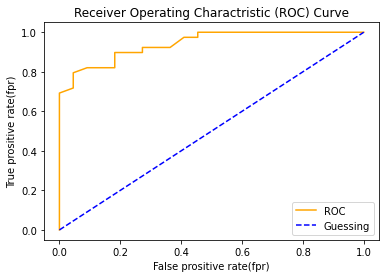

In [87]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color = 'blue', linestyle = '--',label = 'Guessing')
    
    # Customizing the plot
    plt.xlabel('False prositive rate(fpr)')
    plt.ylabel('True prositive rate(fpr)')
    plt.title('Receiver Operating Charactristic (ROC) Curve')
    plt.legend()

plot_roc_curve(fpr, tpr)



In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9417249417249417

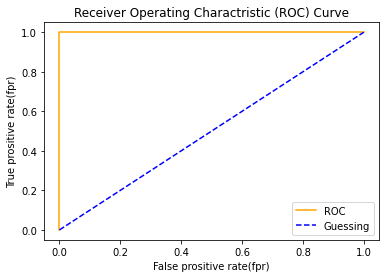

In [89]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds  = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

### Confusion Matrix

Confusion matrix is a quick way to compare the labels a model predics and the actual labels it was supposed to predict.

In essence, giving an idea of where the model is getting confused

In [90]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[16,  6],
       [ 4, 35]], dtype=int64)

In [91]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames = ['Actual Label'], colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,16,6
1,4,35


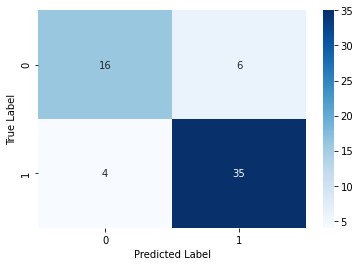

In [92]:
# make our confi=usion matrix more visual with seaborn heatmap()


import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cmap = 'Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');